In [102]:
# Importing all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Loading the dataset
dataset = pd.read_csv('career_change_dataset.csv')
dataset.head()

,Likely to Change Occupation,Freelancing Experience,Geographic Mobility,Professional Networks,Job Satisfaction,Work-Life Balance,Skills Gap,Technology Adoption,Salary,Job Security,Years of Experience,Certifications
0,0,0,1,2,7,10,8,1,198266,8,7,0
1,0,1,1,2,10,3,3,9,96803,9,26,0
2,0,0,0,2,8,3,4,2,65920,4,27,0
3,0,0,0,9,7,9,2,1,85591,5,14,0
4,1,1,0,2,3,1,5,7,43986,3,0,0


In [103]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Likely to Change Occupation  38444 non-null  int64
 1   Freelancing Experience       38444 non-null  int64
 2   Geographic Mobility          38444 non-null  int64
 3   Professional Networks        38444 non-null  int64
 4   Job Satisfaction             38444 non-null  int64
 5   Work-Life Balance            38444 non-null  int64
 6   Skills Gap                   38444 non-null  int64
 7   Technology Adoption          38444 non-null  int64
 8   Salary                       38444 non-null  int64
 9   Job Security                 38444 non-null  int64
 10  Years of Experience          38444 non-null  int64
 11  Certifications               38444 non-null  int64
dtypes: int64(12)
memory usage: 3.5 MB


In [104]:
# Defining features and target
x = dataset.drop(columns=['Likely to Change Occupation'])  # Independent variables
y = dataset['Likely to Change Occupation']  # Dependent variable

# Splitting data into Training and Testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

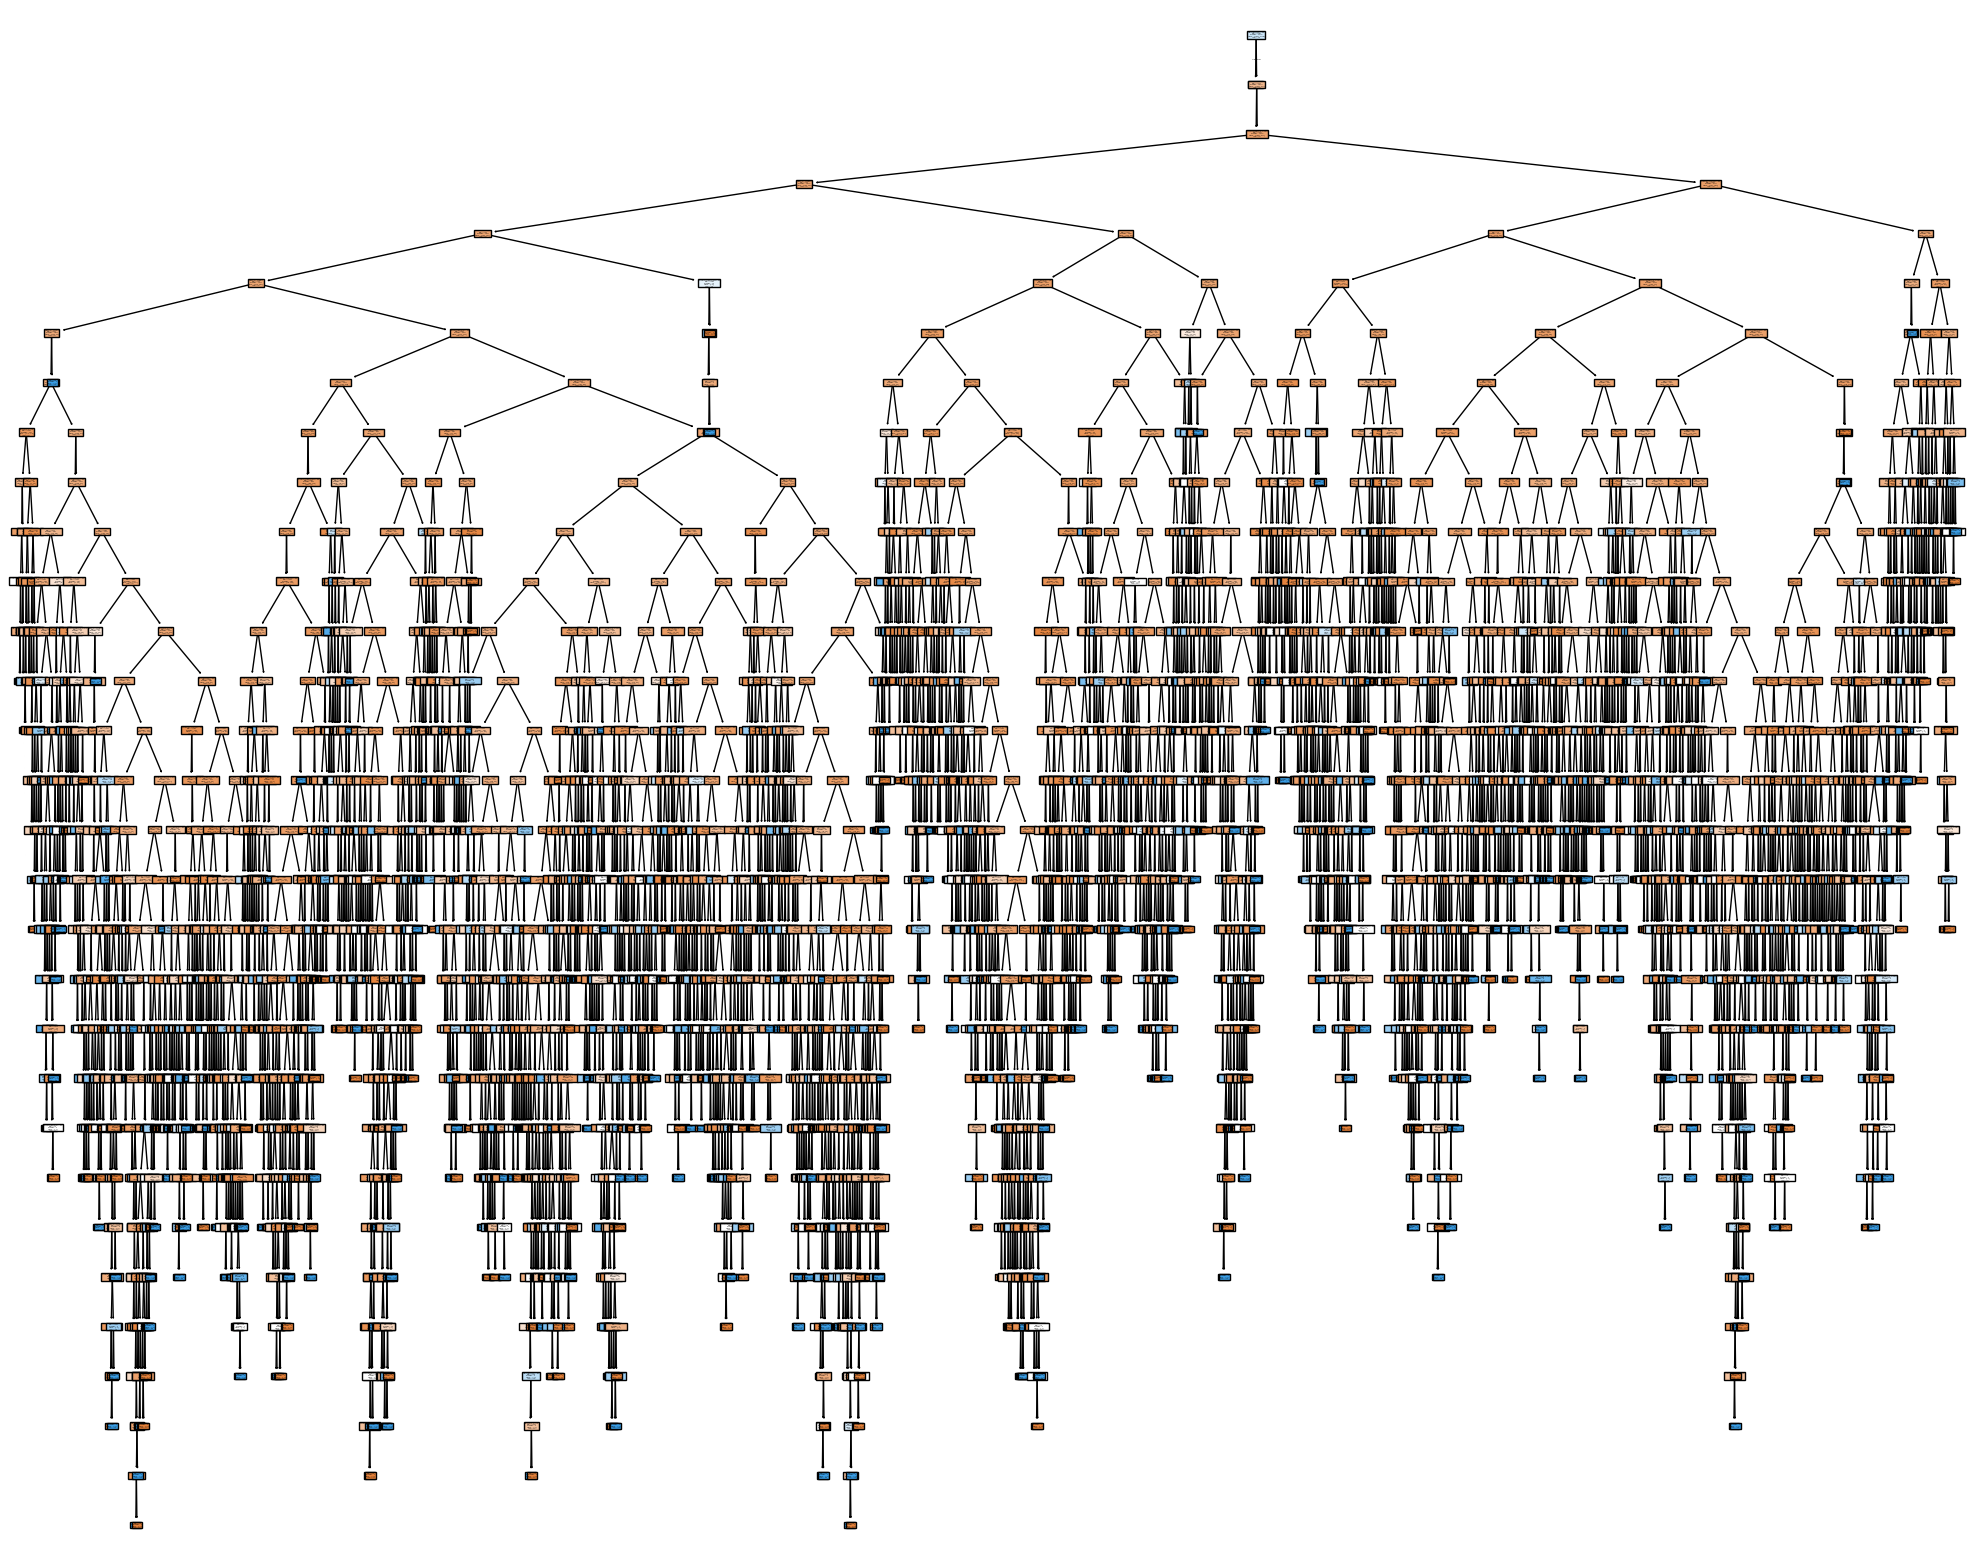

In [ ]:
# Training the Decision Tree Model 
#tree = DecisionTreeClassifier(class_weight=None, random_state=42, max_depth=3, min_samples_split=2, min_samples_leaf=1)
tree = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
tree.fit(x_train, y_train)

# Decision tree visualization
plt.figure(figsize=(25, 20))
plot_tree(tree, feature_names=x.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [106]:
# Make predictions
y_pred = tree.predict(x_test)

# Evaluate accuracy and metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8167512030172974
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77      3212
           1       0.83      0.86      0.85      4477

    accuracy                           0.82      7689
   macro avg       0.81      0.81      0.81      7689
weighted avg       0.82      0.82      0.82      7689

Confusion Matrix:
 [[2420  792]
 [ 617 3860]]


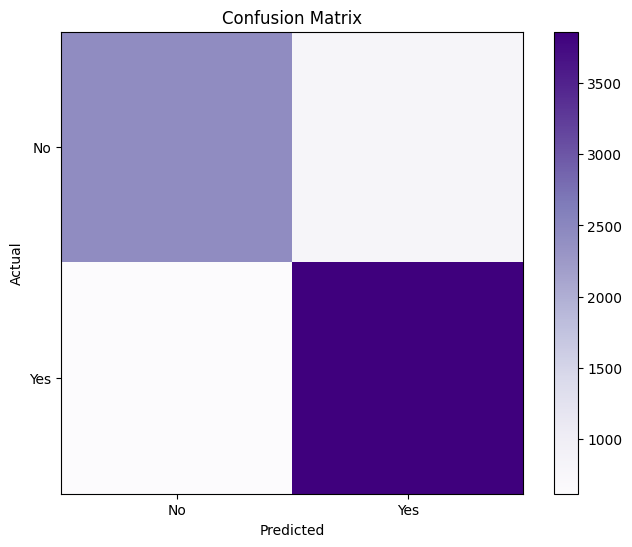

In [107]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Purples')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=np.arange(2), labels=['No', 'Yes'])
plt.yticks(ticks=np.arange(2), labels=['No', 'Yes'])
plt.show()

In [108]:
# Check Feature Importance
importances = tree.feature_importances_
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importances:\n", feature_importances)

Feature Importances:
                    Feature  Importance
3         Job Satisfaction    0.515830
7                   Salary    0.248776
9      Years of Experience    0.043712
8             Job Security    0.036003
2    Professional Networks    0.033759
5               Skills Gap    0.033660
6      Technology Adoption    0.033400
4        Work-Life Balance    0.030999
1      Geographic Mobility    0.009485
10          Certifications    0.007361
0   Freelancing Experience    0.007015


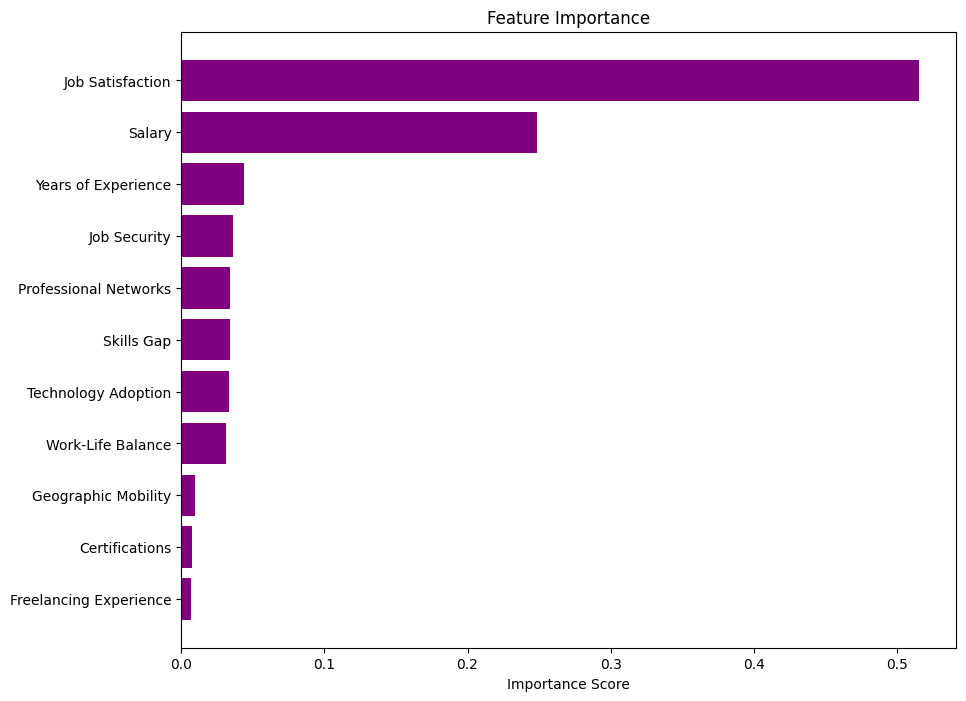

In [109]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='Purple')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()